In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt

In [4]:
import math

In [5]:
%matplotlib inline
tickfontsize=20
labelfontsize = tickfontsize

In [27]:
import importlib
import efrc_ml_production as ml
importlib.reload(ml)

<module 'efrc_ml_production' from '/home/rgur/py_scripts/efrc_ml_production.py'>

In [7]:
from rdkit import Chem

In [8]:
import xgboost as xgb

In [9]:
import datetime
import time

# Define variables

In [17]:
#following must be defined
algo = 'nn' #am I using XGBoost (xgb) or Neural Nets (nn)?
total_frac = .1 #total fraction of data set to work with
training_pct = .7 #how much percent of total fraction should be used for training
random_split = True #make True if the training data should be chosen randomly
n_remote = 10000 #the n_remote most remote points will be added to training set if random_split = False
USE_PCA = True #should I use PCA?
N_COMPONENTS=400 #how many PCA Components should I use?
del_defective_mofs = False #make True if you want to remove all MOFs which a '0' value for at least one geometric property
cat_si_sd = False #make True if you want to concatenate size-indep and size-dep fps
add_size_fp = True #make True if you want to add 20 feature columns, where each feature is the number of atoms in a linker
srt_size_fp = True
size_dependent = False #make True if the input ML-ready data contains fingerprint which does not normalize each PG feature$
stacked = True #make True if the input ML-ready data contains pressure as feature
n_core = 18 #number of cores to use
if not stacked:
    SD_ML_DATA_PATH = '/data/rgur/efrc/prep_data/all_no_norm/ml_data.csv' #path to size-dep data
else:
    SD_ML_DATA_PATH = '/data/rgur/efrc/prep_data/all_no_norm/stacked.csv'
if not stacked:
    SI_ML_DATA_PATH = '/data/rgur/efrc/prep_data/all_v1/ml_data.csv' #path to size-indep data
else:
    SI_ML_DATA_PATH = '/data/rgur/efrc/prep_data/all_v1/stacked.csv'
if not stacked:
    start_str_sd = 'CH4_v/v_248_bar'
    end_str_sd = 'norm_Dom._Pore_(ang.)'
else:
    start_str_sd = 'Density'
    end_str_sd = 'norm_Dom._Pore_(ang.)'


start_str_si = 'filename'
end_str_si = 'valence_pa'


del_geometric_fp = False #make True if you want to ignore the geometric features
cat_col_names = ['oh_1', 'oh_2', 'oh_3', 'oh_4'] #names for interpenetration columns
Y_DATA_PATH = '/data/rgur/efrc/data_DONOTTOUCH/hMOF_allData_March25_2013.xlsx' #path to original hMOF data
default_params = {'objective':'reg:linear', 'colsample_bytree':0.3, 'learning_rate':0.1,
                'max_depth':15, 'alpha':10, 'n_estimators':10}
n_trees = 50 #number of weak learners. Bigger is better until 5000
save_pp = False #make True if you want to save the parity plot
#########################################################################

# Steps before run

In [28]:
if not stacked:
    ml_data, property_used, target_mean, target_std, features = ml.prepToSplit(algo, cat_si_sd, SD_ML_DATA_PATH, 
                                            SI_ML_DATA_PATH, start_str_sd, end_str_sd, start_str_si, end_str_si, 
                                            total_frac, del_defective_mofs, add_size_fp, srt_size_fp, size_dependent, stacked, n_core, 
                                            del_geometric_fp, cat_col_names, Y_DATA_PATH)
if stacked:
    ml_data, property_used, target_mean, target_std, features, p_info = ml.prepToSplit(algo, cat_si_sd, SD_ML_DATA_PATH, 
                                            SI_ML_DATA_PATH, start_str_sd, end_str_sd, start_str_si, end_str_si, 
                                            total_frac, del_defective_mofs, add_size_fp, srt_size_fp, size_dependent, stacked, n_core, 
                                            del_geometric_fp, cat_col_names, Y_DATA_PATH)



Using following 440 features
Mafp_Br1_C2_C1
Mafp_Br1_C2_C2
Mafp_Br1_C2_C3
Mafp_Br1_C3_Br1
Mafp_Br1_C3_C1
Mafp_Br1_C3_C2
Mafp_Br1_C3_C3
Mafp_Br1_C3_C4
Mafp_Br1_C3_N1
Mafp_Br1_C3_N2
Mafp_Br1_C3_N3
Mafp_Br1_C3_O1
Mafp_Br1_C4_Br1
Mafp_Br1_C4_C2
Mafp_Br1_C4_C3
Mafp_Br1_C4_C4
Mafp_Br1_C4_H1
Mafp_Br1_C4_N1
Mafp_Br1_C4_N2
Mafp_Br1_C4_N3
Mafp_Br1_C4_O1
Mafp_Br1_C4_O2
Mafp_Br1_N2_C2
Mafp_Br1_N2_C3
Mafp_Br1_N2_C4
Mafp_Br1_N2_N1
Mafp_Br1_N2_N2
Mafp_Br1_N2_N3
Mafp_Br1_N3_Br1
Mafp_Br1_N3_C2
Mafp_Br1_N3_C3
Mafp_Br1_N3_H1
Mafp_Br1_N3_N2
Mafp_Br1_N3_O2
Mafp_Br1_O2_C2
Mafp_Br1_O2_C3
Mafp_Br1_O2_C4
Mafp_C1_C2_C2
Mafp_C1_C2_C3
Mafp_C1_C2_C4
Mafp_C1_C2_F1
Mafp_C1_C2_H1
Mafp_C1_C2_O1
Mafp_C1_C2_O2
Mafp_C1_C3_C2
Mafp_C1_C3_C3
Mafp_C1_C3_C4
Mafp_C1_C3_Cl1
Mafp_C1_C3_F1
Mafp_C1_C3_H1
Mafp_C1_C3_N2
Mafp_C1_C3_N3
Mafp_C1_C3_O1
Mafp_C1_C3_O2
Mafp_C1_C4_C2
Mafp_C1_C4_C3
Mafp_C1_C4_C4
Mafp_C1_C4_H1
Mafp_C1_C4_O1
Mafp_C1_C4_O2
Mafp_C1_N2_C2
Mafp_C1_N2_C3
Mafp_C1_N2_N2
Mafp_C1_N2_N3
Mafp_C1_N3_C3
Mafp_C1_N3_C4
Mafp

In [29]:
ml_data.head().iloc[:, -20:]

,size_16,size_17,size_18,size_19,size_1,size_2,size_3,size_4,size_5,size_6,size_7,size_8,size_9,norm_vol_uptake,oh_1,oh_2,oh_3,oh_4,log_pressure,norm_log_pressure
0,-0.05004,-0.049703,-0.044044,-0.043852,-0.010455,0.183910,-0.682753,-0.616519,-0.594647,-0.351888,-0.32897,-0.291659,-0.165357,-1.218399,1,0,0,0,0.000000,-1.568109
1,-0.05004,-0.049703,-0.044044,-0.043852,-0.866180,-0.489178,-0.682753,-0.616519,-0.594647,-0.351888,-0.32897,-0.291659,-0.165357,0.751626,1,0,0,0,4.605170,0.808183
2,-0.05004,-0.049703,-0.044044,-0.043852,-0.580938,-1.162265,-0.682753,-0.616519,-0.594647,-0.351888,-0.32897,-0.291659,-0.165357,-0.357497,1,0,0,0,1.757858,-0.661045
3,-0.05004,-0.049703,-0.044044,-0.043852,0.940351,-0.825722,-0.682753,-0.616519,-0.594647,-0.351888,-0.32897,-0.291659,-0.165357,1.018059,1,0,0,0,4.605170,0.808183
4,-0.05004,-0.049703,-0.044044,-0.043852,-0.343237,0.127819,0.695720,0.666837,0.709362,-0.351888,-0.32897,-0.291659,-0.165357,-1.256224,0,1,0,0,0.000000,-1.568109


In [30]:
train_df, test_df= ml.trainTestSplit(ml_data, property_used, training_pct, stacked, 
                                     n_core, random_split, n_remote, features, USE_PCA, N_COMPONENTS)

Total len of test_df + train_df: 53343


In [31]:
if algo == 'xgb':
    train_d, test_d, train_label, test_label = ml.alter_dtype(train_df, test_df, property_used, n_core, algo, features)
else:
    train_d, test_d, train_label, test_label = ml.alter_dtype(train_df, test_df, property_used, n_core, algo, features)

In [32]:
len(train_label) + len(test_label)

53343

# Run Single Model

Good parameters

Train on 29852 samples, validate on 7463 samples
Epoch 1/1000
29504/29852 [============================>.] - ETA: 0s - loss: 0.0665 - mae: 0.1593 - mse: 0.0665
Epoch 00001: val_loss improved from inf to 0.02933, saving model to model_checkpoint.h5

Epoch: 0, loss:0.0660,  mae:0.1589,  mse:0.0660,  val_loss:0.0293,  val_mae:0.1126,  val_mse:0.0293,  
29852/29852 [==============================] - 3s 112us/sample - loss: 0.0660 - mae: 0.1589 - mse: 0.0660 - val_loss: 0.0293 - val_mae: 0.1126 - val_mse: 0.0293
Epoch 2/1000
29824/29852 [============================>.] - ETA: 0s - loss: 0.0256 - mae: 0.1066 - mse: 0.0256
Epoch 00002: val_loss improved from 0.02933 to 0.02577, saving model to model_checkpoint.h5
29852/29852 [==============================] - 3s 108us/sample - loss: 0.0256 - mae: 0.1066 - mse: 0.0256 - val_loss: 0.0258 - val_mae: 0.1090 - val_mse: 0.0258
Epoch 3/1000
29568/29852 [============================>.] - ETA: 0s - loss: 0.0225 - mae: 0.1001 - mse: 0.0225
Epoch 00003:

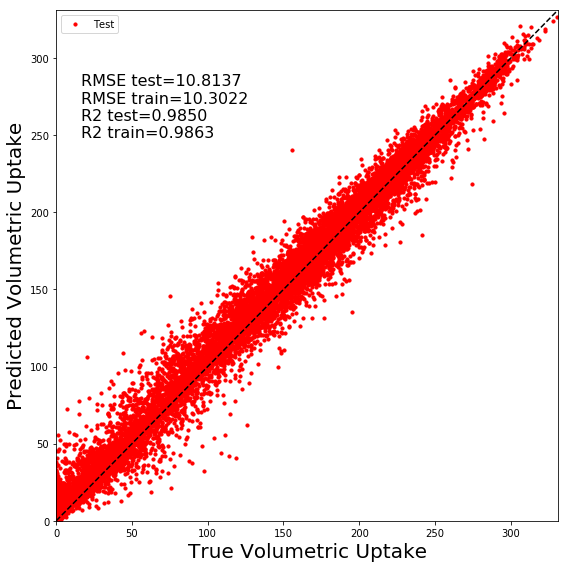

In [33]:
SAVE_FIG = False
params = [100,
       .001,
       3]

MODEL = ml.run_model(algo, train_d, n_trees, params)
ml.parity_plot(MODEL, train_d, test_d, stacked, algo, target_mean, target_std, property_used, test_label, train_label, save=SAVE_FIG)

In [42]:
now = datetime.datetime.now().strftime("%I:%M%p_on_%B_%d_%Y")
now

'07:05PM_on_April_11_2020'

In [ ]:
SAVE_FIG = True

In [ ]:
ml.parity_plot(MODEL, train_d, test_d, stacked, algo, target_mean, target_std, property_used, test_label, train_label, save=SAVE_FIG, fname=now)

In [ ]:
#only run below to save

In [ ]:
if algo=='xgb':
    MODEL.save_model('/data/rgur/efrc/ml/models/%s/%s.xgb' %(now, now))
else:
    MODEL.save('/data/rgur/efrc/ml/models/%s/%s.h5' %(now, now),save_format='h5')

In [85]:
train_df['filename'].to_csv('/data/rgur/efrc/ml/models/%s/train_%s.csv' %(now, now))

/home/modules/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [86]:
test_df['filename'].to_csv('/data/rgur/efrc/ml/models/%s/test_%s.csv' %(now, now))

/home/modules/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [87]:
import pickle

In [88]:
with open('/data/rgur/efrc/ml/models/%s/features_%s.pkl' %(now, now), 'wb') as f:
    pickle.dump(features, f, protocol=3)

# Get inds of defective MOFs and plot

In [ ]:
ml_data, property_used, target_mean, target_std = ml.prepToSplit(ML_DATA_PATH, start_str, end_str, total_frac, 
                                        del_defective_mofs, add_size_fp, size_dependent, stacked, n_core, 
                                        del_geometric_fp, cat_col_names, Y_DATA_PATH)

In [ ]:
train_df, test_df = ml.trainTestSplit(ml_data, property_used, training_pct, stacked, n_core, random_split, n_remote)

In [ ]:
check_cols = ['Dom._Pore_(ang.)',
             'Max._Pore_(ang.)',
             'Void_Fraction',
             'Surf._Area_(m2/g)',
             'Vol._Surf._Area',
             'Density']
to_drop = test_df[(test_df[check_cols].T == 0).any()].index

In [ ]:
to_drop

In [ ]:
train_d, test_d, train_label, test_label = ml.alter_dtype(train_df, test_df, property_used, n_core, algo)

In [ ]:
len(train_label) + len(test_label)

In [ ]:
params = {'objective': 'reg:linear',
   'colsample_bytree': 0.5,
   'learning_rate': 0.15,
   'max_depth': 10,
   'alpha': 2,
   'n_estimators': 10}
MODEL = ml.run_model(algo, n_trees, params)

In [ ]:
now = datetime.datetime.now().strftime("%I:%M%p_on_%B_%d_%Y")
now

In [ ]:
SAVE_FIG = False

In [ ]:
ml.parity_plot(MODEL, stacked, algo, target_mean, target_std, property_used, 
               test_label, train_label, save=SAVE_FIG, fname=now, subset_inds=to_drop.tolist())

# Test functions